<a href="https://colab.research.google.com/github/mefy-Aruna/Face-App/blob/master/Improvised_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'dataset.csv')


In [115]:
x = df.iloc[:, 0:14].values
y = df.iloc[:, 14].values

In [116]:
# Train Test Split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
# Preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)



In [117]:
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier(n_estimators = 200,random_state=0,warm_start=True)
RFclassifier.fit(x_train, y_train)
y_pred = RFclassifier.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred)) 


[[20  5]
 [ 1 30]]
              precision    recall  f1-score   support

           0       0.95      0.80      0.87        25
           1       0.86      0.97      0.91        31

    accuracy                           0.89        56
   macro avg       0.90      0.88      0.89        56
weighted avg       0.90      0.89      0.89        56

0.8928571428571429


In [118]:
labelProb =RFclassifier.predict_proba(x_test)



In [95]:
labelProb.size

112

In [119]:
alpha=0.5
beta=0.5
finalProb=[]


In [94]:
for i in labelProb:
 # print("list: i is:",i)
  if i[1] > alpha and i[1]> i[0]:
   # print("positive")
    add=1
    finalProb.append(add)
  elif i[0]>beta and i[0]>i[1]:
   # print("negative")
    add=0
    finalProb.append(add)
  else:
    print("abstention incurred")

  


list: i is: [0.44 0.56]
positive
list: i is: [0.25 0.75]
positive
list: i is: [0.08 0.92]
positive
list: i is: [0.37 0.63]
positive
list: i is: [0.885 0.115]
negative
list: i is: [0.83 0.17]
negative
list: i is: [0.31 0.69]
positive
list: i is: [0.18 0.82]
positive
list: i is: [0.475 0.525]
positive
list: i is: [0.02 0.98]
positive
list: i is: [0.725 0.275]
negative
list: i is: [0.635 0.365]
negative
list: i is: [0.79 0.21]
negative
list: i is: [0.835 0.165]
negative
list: i is: [0.03 0.97]
positive
list: i is: [0.075 0.925]
positive
list: i is: [0.055 0.945]
positive
list: i is: [0.08 0.92]
positive
list: i is: [0.08 0.92]
positive
list: i is: [0.05 0.95]
positive
list: i is: [0.025 0.975]
positive
list: i is: [0.24 0.76]
positive
list: i is: [0.78 0.22]
negative
list: i is: [0.52 0.48]
negative
list: i is: [0.525 0.475]
negative
list: i is: [0.055 0.945]
positive
list: i is: [0.115 0.885]
positive
list: i is: [0.135 0.865]
positive
list: i is: [0.085 0.915]
positive
list: i is: [0.08

In [87]:
y_test

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [90]:
finalLabelProb=np.asarray(finalProb)

In [97]:
finalLabelProb.size

112

In [100]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, finalProb)) 

[[11  6]
 [ 6 33]]
              precision    recall  f1-score   support

           0       0.65      0.65      0.65        17
           1       0.85      0.85      0.85        39

    accuracy                           0.79        56
   macro avg       0.75      0.75      0.75        56
weighted avg       0.79      0.79      0.79        56

0.7857142857142857


In [102]:
#ROC curves
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, finalProb)
sensitivity = tpr
specificity= 1-fpr

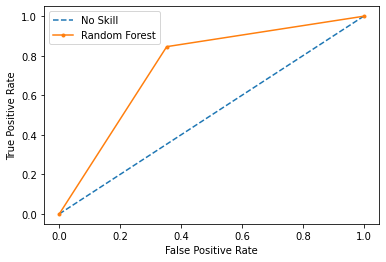

In [103]:
# plot the roc curve for the model
from matplotlib import pyplot

pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [105]:
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))

In [107]:
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=1.000000, G-Mean=0.740


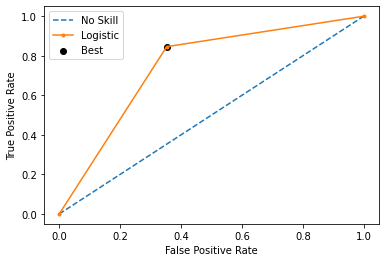

In [108]:
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [110]:

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, finalProb)
# get the best threshold
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=1.000000


Best Threshold=1.000000, F-Score=0.846


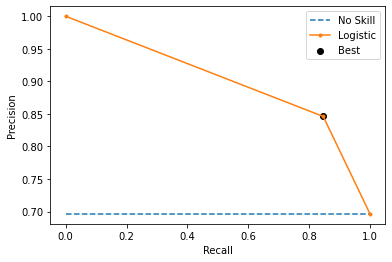

In [112]:
# calculate roc curves
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, finalProb)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()